In [ ]:
import pandas as pd
data = pd.read_csv('/content/sample_data/Housing.csv')

In [ ]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

1. Feature array is represented as x.
2. Target array is represented as y.

In [ ]:
x = data['area'].values
y = data['price']

In [ ]:
import numpy as np


In [ ]:
# Assuming 'x' is your NumPy array
x = np.reshape(x, (-1, 1))


In [ ]:
y[:3]

0    13300000
1    12250000
2    12250000
Name: price, dtype: int64

Simple Linear Regression:
1. Linear Regression :: target is continuous variable.
1. Only one feature.
2. price = b0 + b1*area

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#Create object
lr_simple = LinearRegression()

ML Modelling involves
  1. Load the dataset
  2. Preprocessing the dataset(Cleaning) & get it ready.
  3. Split the dataset into train and test subsets.
  
    3.1. Train subset will be used to train the model and test subset for testing the accuracy of the model.
  4. Train the model using fit() function on train subset.
  5. Evaluate the model performance using test subset.

In [ ]:
from sklearn.model_selection import train_test_split        #Step-3

In [ ]:
trainx, testx, trainy, testy = train_test_split (x,y, test_size=0.2, random_state=40)

In [ ]:
print(trainx.shape, trainy.shape, testx.shape, testy.shape)

(436, 1) (436,) (109, 1) (109,)


In [ ]:
lr_simple.fit(trainx, trainy)

LinearRegression()

Evaluate the accuracy

In [ ]:
ypreds = lr_simple.predict(testx)

1. ypreds are the predicted values of testx.
2. testy are the true values in the test set.

_____

Performance metrics for Linear Regresion ::
 1. Mean Sq. Error
 2. Absolute Error
 3. Root Mean Sq. Error

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(ypreds,testy)

3263874991997.8794

In [ ]:
np.sqrt(mean_squared_error(ypreds,testy))

1806619.7696244442

In [ ]:
x[:5]

array([[7420],
       [8960],
       [9960],
       [7500],
       [7420]])

In [ ]:
sample_preds = lr_simple.predict([[7420]])

In [ ]:
y[:3]

0    13300000
1    12250000
2    12250000
Name: price, dtype: int64

Multiple Linear Regression ::
  1. Features :: area, bedrooms

In [ ]:
x = data[['area', 'bedrooms']]
y = data['price']

In [ ]:
trainx, testx, trainy, testy = train_test_split (x,y, test_size=0.2, random_state=40)

In [ ]:
lr_mul = LinearRegression()

In [ ]:
lr_mul.fit(trainx, trainy )

LinearRegression()

In [ ]:
ypreds_mul = lr_mul.predict(testx)

In [ ]:
np.sqrt(mean_squared_error(ypreds_mul,testy))

1679992.2288600518

Add some more imp. features & tabulate the loss.

____________________________________________

In [ ]:
x = data[['area', 'bedrooms', 'bathrooms']]
y = data['price']

In [ ]:
trainx, testx, trainy, testy = train_test_split (x,y, test_size=0.2, random_state=40)

In [ ]:
lr_mul1 = LinearRegression()

In [ ]:
lr_mul1.fit(trainx, trainy )
ypreds_mul = lr_mul1.predict(testx)
np.sqrt(mean_squared_error(ypreds_mul,testy))

1550407.6630327187

___________________________________________________

In [ ]:
x = data[['area', 'bedrooms', 'bathrooms', 'stories']]
y = data['price']
trainx, testx, trainy, testy = train_test_split (x,y, test_size=0.2, random_state=40)
lr_mul2 = LinearRegression()
lr_mul2.fit(trainx, trainy )
ypreds_mul = lr_mul2.predict(testx)
np.sqrt(mean_squared_error(ypreds_mul,testy))

1463433.9640649084

In [ ]:
x = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = data['price']
trainx, testx, trainy, testy = train_test_split (x,y, test_size=0.2, random_state=40)
lr_mul3 = LinearRegression()


In [ ]:
# Create a LinearRegression model
lr_mul3 = LinearRegression()

# Fit the model on training data
lr_mul3.fit(trainx, trainy)

# Make predictions on test data
ypreds_mul = lr_mul3.predict(testx)

# Calculate root mean squared error
rmse = np.sqrt(mean_squared_error(ypreds_mul, testy))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 1427476.784356935


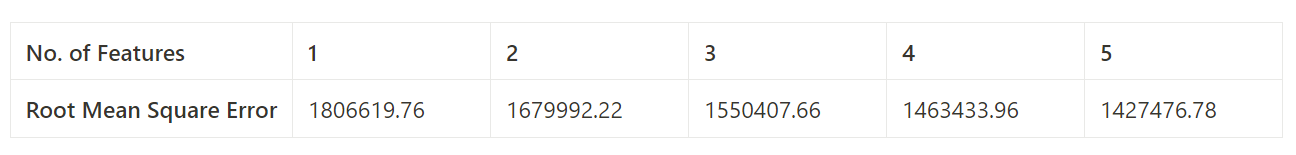

_____________________________________


In [ ]:
data['area'].head()

0    7420
1    8960
2    9960
3    7500
4    7420
Name: area, dtype: int64

Normalization ::  
  1. Range of values for diff. fatures very largely, they have to be brought down to similar ranges. Otherwise, the features with large ranges influence the model/function.
  2. Dataset may contain missing values that have to be handled.
  3. Dataset may also contain exceptions/extereme values calles outliers.

  Hence you have to perform data pre-processing before building a model/function.

In [ ]:
data['bedrooms'].head()

0    4
1    4
2    3
3    4
4    4
Name: bedrooms, dtype: int64

_________________________________

Regression function :

Y = f(x1,x2,x3,.....) = w0 + w1*x1 + w2*x2......

w0, w2 - function parameters.

x, y are available in dataset.

Our job is to find parameter values.

Simple LR : One feature (x1).
  Y (Y_predicted) = w0 + w1*x1

Regression function gives y_pred and dataset contains y values (true value of y)

We have to find the parameters such that the diff. btw y_pred and y values is minimized.This diff. is called as Error.

If the dataset has m rows/observations/instances,

Excel Sheet(refer)

Loss= Sigmasq.(yi - ypred)

We measure the performance of the model where it gives the min. loss.

  1. Mean Sq. Error (Standard)
  2. Absolute Error


Our objective in building the model is finding out the para is to minimize the loss.

Mean sq. Error is our Loss function which is a sq. function. This is a Convex Function(It will have only one minimum).

Non convex function will have multiple minimums like sine,cosine graphs.

**Gradient Descent Algorithm** is to find optimal values of the parameters where loss is minimum.

Attach the Graph.



**Gradient Descent Algorithm**

  1. Take initial value of 'W'.
  2. Modify W value, W = W - alpha*dL/dW.
  3. Repeat Step2 until convergence (till it reaches almost zero).
  
  Convergence criteria ::

  1. When derivative is 0, W does nnot get updated..ie, you reached Loss function minimum.
  2. Repeat N no.of times.
  3. Alpha is called step/learning rate :: typically 0.001.
  4. For large alpha value may lead to fluctuating around minimum but not reaching it.
  5. For small values of Alpha require more time for convergence.

Formulae:::

  Objective is to minimize the L value.

GD for Simple LR ::

  1. Take initial values for w1, w0
  2. Repeat,
        w0 = w0 - Alpha*dL/dW0
        w1 = w1 - Alpha*dL/dW1
        
        Until Convergence.



 Diff. types of GD Algorithms ::
  1. GD :: Entire dataset for updating parameters.
  2. Mini- batch GD :: Batches/subsets of dataset.
  3. Stochastic GD  :: One observation/row of the dataset.

__________________________


What are the diff loss functions in LR?





# 22/8/23

Linear Regression

Classification ::
  Each unique value in the target is called class/category.

  If no. of classes is 2 that is Binary classification.

  Eg: Spam/non-Spam, Male/Female

  If no. of classes is more than 2 that is Multi class Classification.
  
  Eg: 1. emails-spam, company, personal

  2. tumors - beginin, stage1, stage2



In [ ]:
import pandas as pd
data = pd.read_csv('/content/sample_data/Iris.csv')

In [ ]:
data.columns


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#ID is not the characteristic of the flower so dropit.
data.drop('Id', axis=1, inplace = True)

In [ ]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Species is a categorical value with 3 classes.

In [ ]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
data.shape

(150, 5)

In [ ]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
target = 'Species'

# As target is categorical variable, it is a Multi-Class classification problem(3).

The string values in the target has to be converted into numerics before builing a Model.

In [ ]:
# Lets convert into binary classification problem by removing one of the classes.
df = data[data['Species']!='Iris-virginica']

In [ ]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df['Species'].replace(['Iris-setosa','Iris-versicolor'],[0,1], inplace = True)



<ipython-input-47-054aa0188295>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Species'].replace(['Iris-setosa','Iris-versicolor'],[0,1], inplace = True)


In [ ]:
df['Species'].value_counts()

0    50
1    50
Name: Species, dtype: int64

In [ ]:
x = df[features]
y = df[target]
print(type(x), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [ ]:
# Divide the dataset into train and test.
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain,  ytest = train_test_split(x,y,test_size=0.2, random_state=40 )
print(xtrain.shape, xtest.shape, ytrain.shape,  ytest.shape)

(80, 4) (20, 4) (80,) (20,)


Classification Algorithms::
  1. Logistic Regression
  2. Decision Tree
  3. SVM
  4. KNN
  5. Naive Bayes
  6. Neural Networks

In [ ]:
# Building Logistic Regression :
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
lr.fit(xtrain, ytrain)

#Predict using the model.
ypred = lr.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ypred, ytest)*100

100.0

In [ ]:
#Predicted y
print(ypred[:10])

[1 1 1 0 0 0 0 0 0 1]


In [ ]:
#True values of y
ytest[:10]

79    1
75    1
63    1
15    0
38    0
11    0
40    0
45    0
39    0
62    1
Name: Species, dtype: int64

Metrics used for evaluation for performance Elavuation ::

   1. Confusion_matrix ::

        True negatives

        False positives

        False negatives.

      (Attachment)
      It is N*N matrix for N no. of classes.

      The main diagnol values are the ones that are correctly predicted & others are errors.

    2. Accuracy_score ::
      How many are correctectly predicted out of M no. of observations.

    3. Classification_report ::

      | Precision : True positives : proportion of actual positives out of positives.
           
         P = TP+FP/TP

        Eg :: Total positive preds = 25

        Actual positives = 20
        
        Precision =20/25

      |Recall : Proportion of actual positives
      
       R = TP/TP + FN

      |F1 Score :

      F1 Score = 2(precesion*recall/precision+recall)


Imbalanced Dataset :: More observations of one class and very few observations of the other class.

  Most of the medical datasets, products, fraud casses are imbalanced.

  So, as a pre-processing step , imbalanced dataset have to be handled.
  
  You should get observations/generate more observations, remove extra data observations.
  
  Up sampling and Down Sampling.


Regression problem can be converted to classification problem if we can convert continuous values into 0 or 1.

  This is done using Sigmoid function on h(x)/ypred.





In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
confusion_matrix(ytest, ypred)

array([[12,  0],
       [ 0,  8]])

In [ ]:
classification_report(ypred,ytest)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        12\n           1       1.00      1.00      1.00         8\n\n    accuracy                           1.00        20\n   macro avg       1.00      1.00      1.00        20\nweighted avg       1.00      1.00      1.00        20\n'

## **24/8/2023**